The research question I explored is whether the American film industry is progressing in increasing representation for Asian Americans and Pacific Islanders. To answer this question, I needed to know about the prevalence of Asian Americans and Pacific Islanders as movie characters across many films over a certain time frame. 

As an Asian American, I am instilled with the hope that I can still achieve my dreams as a minority in America whenever I see an Asian American actor depicted on television or in a film. Unfortunately, most roles in American movies are still occupied by white actors. Increasing the acknowledgment of how racism affects the film industry can raise the likelihood of constructive change. As the media becomes increasingly ingrained into our lives, opportunities for people of color to see themselves represented in the media for the world to acknowledge are still scarce. While it’s joyful seeing Asian Americans celebrate small victories in the American film industry such as Simu Liu’s success, the triumph of *Squid Game*, or Youn Yuh-Jung’s momentous Oscar win, their need to celebrate suggests that America has yet to approach the normalization of integrating people of color in its films.

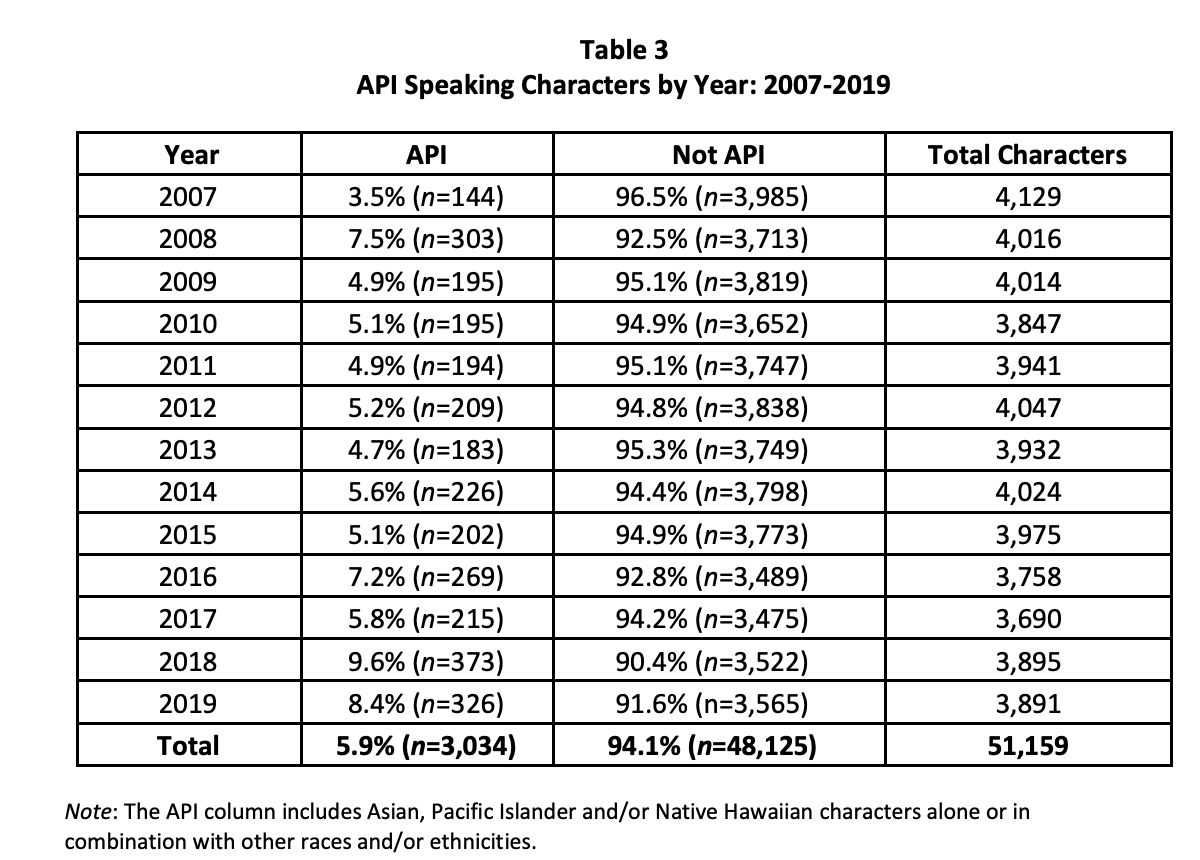

This dataset, which I am using to answer my research question, was obtained from a study performed in May 2021 by the USC Annenberg Inclusion Initiative. 

This dataset includes the percentage and number of API (Asian or Pacific Islander) speaking characters versus the percentage and number of non-API speaking characters in the annual 100 top-grossing films from 2007 to 2019. A character was classified as API if they are Asian, Pacific Islander, and/or Native Hawaiian alone or one of the aforementioned races along with other ethnicities and/or races. Within all the movies, a total of 51,159 speaking characters were examined, 3,034 (5.9%) of which were API and 48,125 (94.1%) of which were not API. Hence, non-API speaking characters dominated within these films compared to API speaking characters.

In [10]:
API_FILE = "api_speaking_characters.txt"
DISPARITY_FILE = "asian_disparity.txt"

COLORS1 = ["gold", "dimgrey"]
COLORS2 = ["maroon", "springgreen"]
RACE_LABELS = ["API", "Not API"]

import matplotlib.pyplot as plt

In [11]:
def txt_to_dicts(filename):
    """ 
    Function: txt_to_dicts
    Parameter: filename, a string
    Returns: a list of dictionaries, where each dict contains the stats for a movie in a certain yr (keys = a race  
    category for the characters (str), values = the year + # of speaking characters of a particular race in that year
    (strings))
    """
    data = []
    
    with open(filename, "r") as infile:
        keys = infile.readline()
        keys = keys.split()
        while True: 
            d = {}
            row = infile.readline()
            row = row.split()
            if row[0] == "Total":
                break
          
            for i in range(len(row)):
                d[keys[i]] = row[i]
            data.append(d)
            
    return data

In [12]:
def sort_data(list_of_dict, race1, race2):
    """
    Function: sort_data
    Parameters: a list of dictionaries, where each dict contains the stats for a movie in a certain yr (keys = a race  
    category for the characters (str), values = the year + # of speaking characters of a particular race in that year
    (strings)), and two races that categorize the speaking characters (strings)
    Returns: A dict (keys = "Years" & the inputted races (str), values = the appropriate data for each key (years, 
    which are strings, or the # of speaking characters of a certain race per year, which are ints)
    """

    sorted_dict = {"Years": [], race1 : [], race2: []}

    for dict in list_of_dict:
        for key, value in dict.items():
            if key == "Year":
                sorted_dict["Years"].append(value)
            elif key == race1:
                sorted_dict[race1].append(int(value))
            elif key == race2:
                sorted_dict[race2].append(int(value))
            
    return sorted_dict              

In [13]:
def plot_api_vs_not(labels, data1, data2, colors, width):
    """
    Function: plot_api_vs_not
    Parameters: Three lists, one with years to be used as bar labels (strings), one with the number of speaking 
    characters of one race per yr (ints), and one w/ the # of speaking characters per year of another race(s) (ints); 
    a list of colors for the plot (strings); a value for the width of each bar (float)
    Returns: Nothing, just generates a stacked bar chart representing the data
    """
    plt.bar(labels, data1, color = colors[0], width = width, label = "API")
    plt.bar(labels, data2, color = colors[1], width = width, bottom = data1, label = "Not API")
    plt.ylabel("Speaking Characters")
    plt.xlabel("Year")
    plt.title("API vs. Non-API Speaking Characters by Year: 2007-2019")
    plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

In [14]:
def plot_pie_chart(labels, data1, data2, colors):
    """
    Function: plot_pie_chart
    Parameters: Three lists, one with race names to be used as slice labels (strings), one with the number of speaking 
    characters of one race per yr (ints), and one w/ the # of speaking characters per year of another race(s) (ints); 
    a list of colors for the plot (strings)
    Returns: Nothing, just generates a pie chart representing the data
    """
    values = []
    explode = (0.1, 0)
    
    data1_percent = (sum(data1) / sum(data1 + data2)) * 100
    data2_percent = (sum(data2) / sum(data1 + data2)) * 100
    
    values.append(data1_percent)
    values.append(data2_percent)
   
    plt.pie(values, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, colors = colors)
    plt.axis("equal")
    plt.title("API vs. Non-API Speaking Characters from 2007-2019 (Overall)")

In [15]:
def plot_asian_disparity(labels, data1, data2, colors, width):
    """
    Function: plot_asian_disparity
    Parameters: Three lists, one with years to be used as bar labels (strings), one with the number of speaking 
    characters of one race per yr (ints), and one w/ the # of speaking characters per year of another race(s) (ints); 
    a list of colors for the plot (strings); a value for the width of each bar (float)
    Returns: Nothing, just generates a stacked bar chart representing the data
    """
    plt.bar(labels, data1, color = colors[0], width = width, label = "Asian/Asian American")
    plt.bar(labels, data2, color = colors[1], width = width, bottom = data1, label = 
            "Native Hawaiian/Pacific Islander")
    plt.ylabel("Speaking Characters")
    plt.xlabel("Year")
    plt.title("Asian/Asian American vs. Native Hawaiian/Pacific Islander Speaking Characters by Year: 2007-2019")
    plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

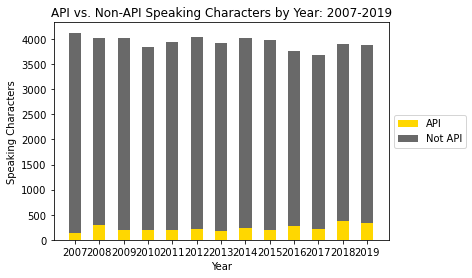

In [16]:
def main1():
    
    # Creates a stacked bar chart indicating the number of API vs. non-API speaking characters in the annual 100 
    # top-grossing films from 2007 to 2019. A legend, title, and axes labels are included on the chart.
    
    data = txt_to_dicts(API_FILE)
    sorted_dict = sort_data(data, "API", "Not_API")
    years = sorted_dict["Years"]
    api = sorted_dict["API"]
    not_api = sorted_dict["Not_API"]
    
    plot_api_vs_not(years, api, not_api, COLORS1, 0.5)
    
main1()

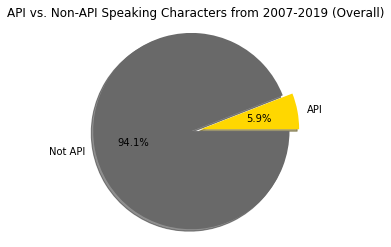

In [17]:
def main2():
    
    # Creates a pie chart indicating the overall percentages of API and non-API speaking characters in the annual 100 
    # top-grossing films from 2007 to 2019. A title and slice labels are included.
    
    data = txt_to_dicts(API_FILE)
    sorted_dict = sort_data(data, "API", "Not_API")
    api = sorted_dict["API"]
    not_api = sorted_dict["Not_API"]
    
    plot_pie_chart(RACE_LABELS, api, not_api, COLORS1)
    
main2()

The stacked bar chart above confirms the unfortunate reality that little progress has been made regarding the expansion of API-speaking character roles in American films. In the stacked bar chart, the golden segments in each bar indicate the number of API speaking characters in the examined films, while the gray segments indicate speaking characters of other races. The gray segments continue to dominate within all the bars for each year from 2007 to 2019, while the golden segments form only a sliver of each bar. Hence, one can conclude that even if there is some acknowledgment of the improper distribution of speaking roles to characters based on their race, a lot more work needs to be done to normalize the presence of API speaking characters in popular films. Film companies in America need to realize that our world’s beautiful diversity is not reflected in their work. If more companies yield the courage to lead by example and diversify their characters, the movie industry would likely take greater strides toward fostering inclusivity.

The pie chart above illustrates the overall percentage of API speaking characters vs. that of non-API speaking characters in the annual 100 top-grossing films from 2007 to 2019. The chart emphasizes the overwhelming overall percentage of non-API speaking characters in those films (94.1%) versus the distressing overall percentage of API speaking characters in those films (5.9%).

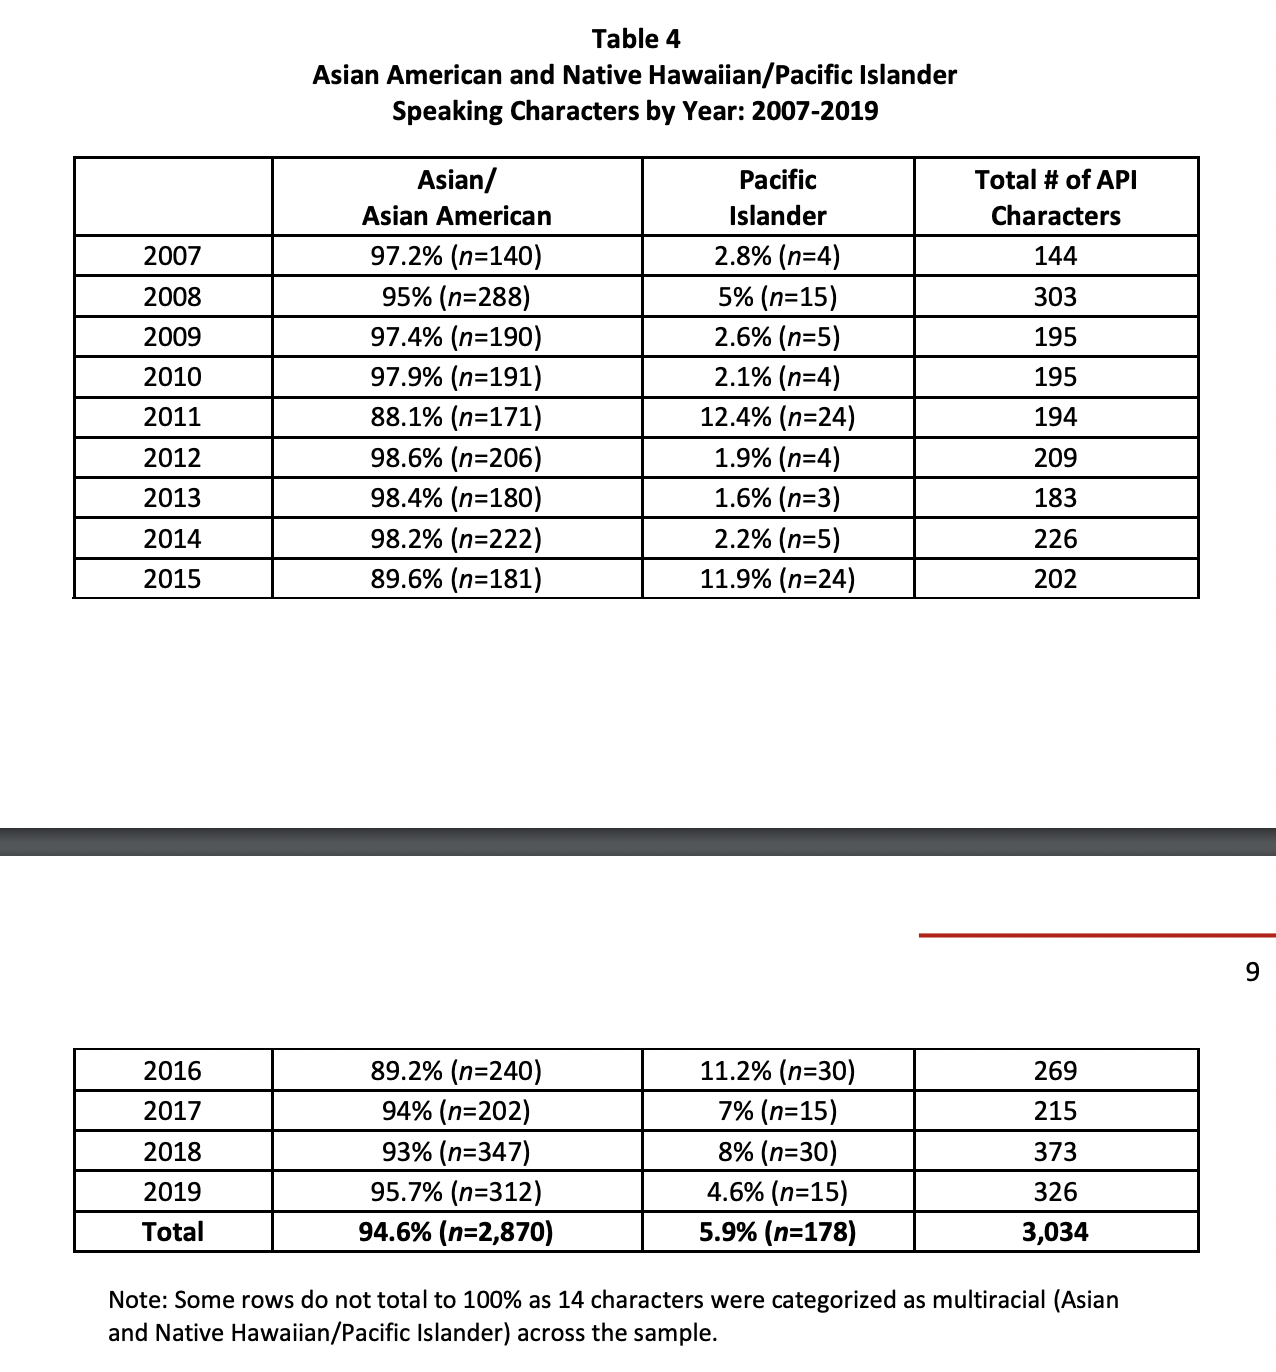

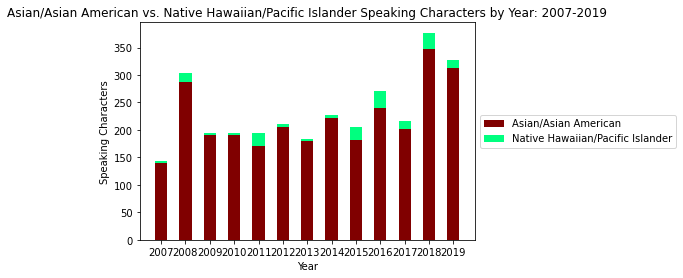

In [18]:
def main3():
    
    # Makes a stacked bar chart indicating the # of Asian/Asian American vs. Native Hawaiian/Pacific Islander speaking 
    # characters in the annual 100 top-grossing films from 2007 to 2019. A legend, title, & axes labels are included.
    
    data2 = txt_to_dicts(DISPARITY_FILE)
    sorted_dict = sort_data(data2, "Asian/Asian_American", "Pacific_Islander")
    years = sorted_dict["Years"]
    asian = sorted_dict["Asian/Asian_American"]
    pacific_islander = sorted_dict["Pacific_Islander"]
    
    plot_asian_disparity(years, asian, pacific_islander, COLORS2, 0.5)
    
main3()

However, the gray and golden visualizations contain limitations. Those visualizations were created based on Table 3, which homogenizes Asians and Pacific Islanders into one category without considering the disparity within the category itself. Filipinos like me and other Southeast Asians are rarely depicted in American media. In fact, the researchers found in another part of their study (refer to table 4) that of the API speaking characters they reviewed, most were Asian or Asian American (2,870, or 94.6% of the API speaking characters). Only 178, or 5.9%, were Native Hawaiian/Pacific Islander. The changes in the number of Asian/Asian American versus the number of Native Hawaiian/Pacific Islander speaking characters from 2007 to 2019 in the annual 100 top-grossing films are shown in the bar chart above. It's important to note that the three notable upticks in the percentage of Native Hawaiian/Pacific Islander representation in 2011, 2015, and 2016 stem from these four popular films: ***Just Go With It*** (2011), ***Soul Surfer*** (2011), ***Aloha*** (2015), and ***Moana*** (2016). These films suggest that the inequality within API representation is very inconsistent since efforts to shatter that inequality are effective only very temporarily.

Furthermore, the footnote under table 3 states that some people classified as API were partially of a race and/or ethnicity that wasn’t Asian, Pacific Islander, or Native Hawaiian, but this distinction is unclear within the first two visualizations. Those plots would not let me confirm whether film producers are likely to favor European-looking Asians over individuals whose physical features are mostly Asian-resembling. The visualizations also do not emphasize the gender disparity within the population of API speaking characters. The researchers separately state that the ratio of API males to API females for speaking roles is 1.7 to 1. Furthermore, none of the visualizations emphasize the lack of screen time an Asian or Pacific Islander may occupy in a film. Particularly, some films contain many API *side* speaking characters who are overshadowed by a few speaking characters of another race who are prominently featured. The visualizations also only represent the poor prevalence of API speaking characters in popular U.S. films, so API speaking characters in poorly-rated films are not considered. This possibility still does not belittle the right for API actors to have the opportunity to participate in high-quality media projects. Finally, the visualizations do not address how Asians who are cast in American films tend to be the same ones. For instance, many people complain about how Aquafina has been cast for many movies such as *Raya and the Last Dragon*, *Crazy Rich Asians*, and *Shang-Chi and the Legend of the Ten Rings* despite the number of inexperienced Asian actors who deserve a chance for fame. I agree with those critics that choosing the same Asians for Asian roles still impedes the film industry from being as inclusive as it can be. 